**Fraud detection ML**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'card_transdata.csv'
#Limit: (,nrows=x)
df = pd.read_csv(dataset_path)

print(df.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [121]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [122]:
#Summary statistics
print(df.describe())

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%   

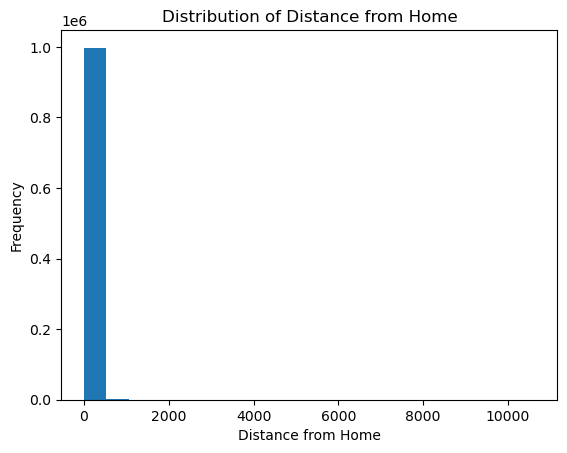

In [123]:
#Data distribution
import matplotlib.pyplot as plt

plt.hist(df['distance_from_home'], bins=20)
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distribution of Distance from Home')
plt.show()


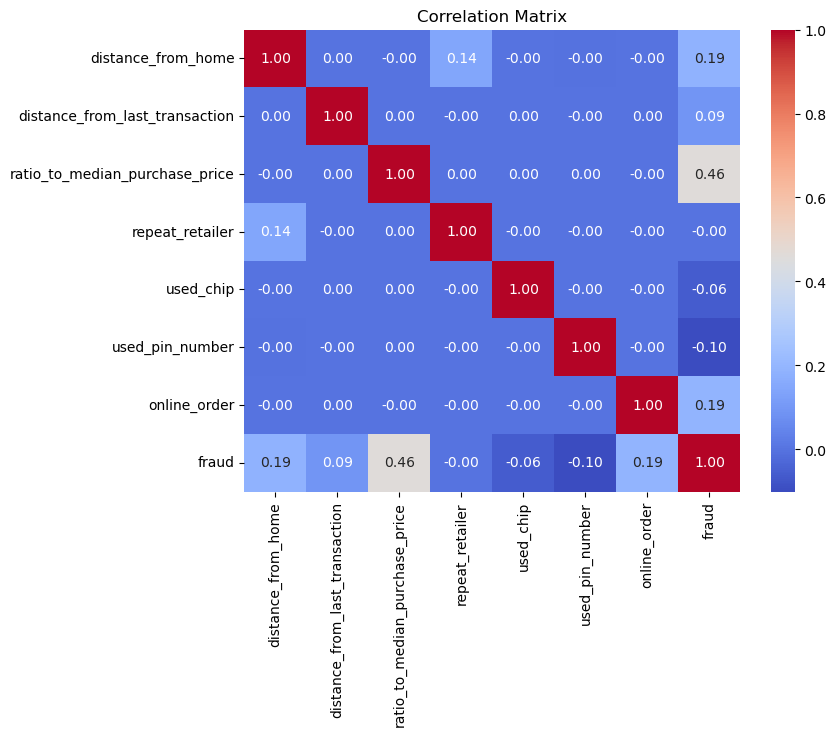

In [124]:
#Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [125]:
#Class distribution
fraud_distribution = df['fraud'].value_counts()
print(fraud_distribution)

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


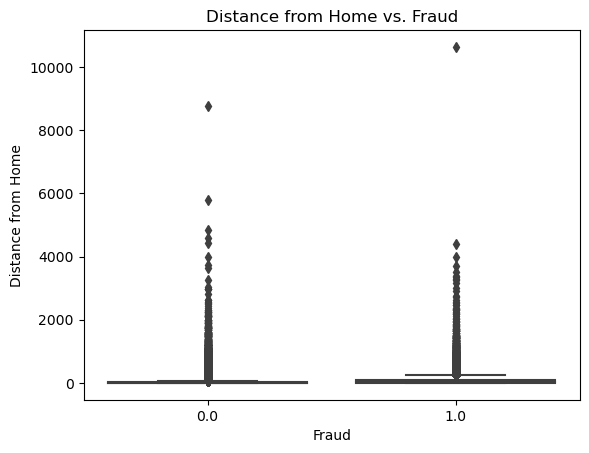

In [126]:
#Feature Analysis
import seaborn as sns

sns.boxplot(x='fraud', y='distance_from_home', data=df)
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.title('Distance from Home vs. Fraud')
plt.show()


In [127]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [128]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(
    use_cat_names=True, 
    cols=['repeat_retailer','used_chip','used_pin_number','online_order']
)

# Transform data
encoded_r = ohe.fit_transform(df)

# Data is analysis-ready
encoded_r.head()

C:\Users\mckyl\AppData\Roaming\Python\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\mckyl\AppData\Roaming\Python\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\mckyl\AppData\Roaming\Python\Python311\site-packages\category_encoders\ordinal.py:198: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer_1.0,repeat_retailer_0.0,used_chip_1.0,used_chip_0.0,used_pin_number_0.0,used_pin_number_1.0,online_order_0.0,online_order_1.0,fraud
0,57.877857,0.311140,1.945940,1,0,1,0,1,0,1,0,0.0
1,10.829943,0.175592,1.294219,1,0,0,1,1,0,1,0,0.0
2,5.091079,0.805153,0.427715,1,0,0,1,1,0,0,1,0.0
3,2.247564,5.600044,0.362663,1,0,1,0,1,0,0,1,0.0
4,44.190936,0.566486,2.222767,1,0,1,0,1,0,0,1,0.0


In [129]:
label = 'fraud'
X = encoded_r.drop(columns=[label], inplace=False)
y = encoded_r[label]

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2
                                                  , random_state=42)

# print the shape of splitted data
print(
    f'Training dataset \
    \nX_train: {X_train.shape[0]/len(X)*100:.0f}% \ny_train: {y_train.shape[0]/len(X)*100:.0f}% \
    \n\nValidation dataset \
    \nX_val: {X_val.shape[0]/len(X)*100:.0f}% \ny_val: {y_val.shape[0]/len(X)*100:.0f}%'
)

Training dataset     
X_train: 80% 
y_train: 80%     

Validation dataset     
X_val: 20% 
y_val: 20%


In [131]:
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the benchmark
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.91


In [132]:
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [133]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [134]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.95880375
Logistic Regression, Validation Accuracy Score: 0.958685


In [135]:
model_lr.predict(X_val)

array([0., 0., 0., ..., 1., 0., 0.])

In [136]:
y_train_pred_proba = model_lr.predict_proba(X_val)
print(y_train_pred_proba[:5])

[[9.66118652e-01 3.38813477e-02]
 [7.33483314e-01 2.66516686e-01]
 [9.99927604e-01 7.23956809e-05]
 [6.94383404e-01 3.05616596e-01]
 [9.99891335e-01 1.08665018e-04]]


In [137]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
coefs = model_lr.named_steps["logisticregression"].coef_[0]

C:\Users\mckyl\AppData\Roaming\Python\Python311\site-packages\category_encoders\utils.py:366: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



In [138]:


odds_ratios = pd.Series(np.exp(coefs), index=features).sort_values()
odds_ratios.head()

used_pin_number_1.0    0.000111
online_order_0.0       0.003208
used_chip_1.0          0.052825
repeat_retailer_1.0    0.065308
repeat_retailer_0.0    0.120803
dtype: float64

In [139]:
import plotly.express as px
plt.Figure(figsize=(15,10))
fig = px.bar(
    data_frame=odds_ratios, 
    x=odds_ratios[:15].values, 
    y=odds_ratios[:15].index, 
    title="Customer Churn Logistic Regression, Feature Importance (Odds Ratio)"
)

fig.update_layout(xaxis_title='Odds Ratio', yaxis_title='')
fig.show()

In [140]:
depth_hyperparams = range(1, 16)

# List of scores per each set for visualization purpose
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Build model
    model_dt = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # Fit model
    model_dt.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))

In [141]:
tune_data = pd.DataFrame(
    data = {'Training': training_acc, 'Validation': validation_acc}, 
    index=depth_hyperparams
)

# Display the figure
fig = px.line(
    data_frame=tune_data, 
    x=depth_hyperparams, 
    y=['Training', 'Validation'], 
    title="Training & Validation Curves (Decision Tree Model)"
)

# Add axes titles
fig.update_layout(xaxis_title ="Maximum Depth", yaxis_title="Acccuracy Score")
fig.show()

In [142]:
final_model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=6, random_state=42)
)

# Fit Final Model
final_model_dt.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [143]:
y_val_pred = final_model_dt.predict(X_val)
y_val_pred[:5]

array([0., 0., 0., 0., 0.])

In [144]:
print(f'Final model accuracy: {accuracy_score(y_val, final_model_dt.predict(X_val))}%')

Final model accuracy: 0.99993%
